In [161]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('train.csv')

In [162]:
# vizualição inicial para checar possiveis erros e planejar tratativas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [163]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [164]:
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont') & (df['Postal Code'].isnull()),'Postal Code' ] = 5401

In [165]:
df[(df['City'] =='Burlington') & (df['State'] == 'Vermont')].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04


In [166]:
# verificando se ainda existe valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [167]:
# Pergunta de négocio 1, Vendas por ano pelas colunas Ano e Vendas

In [168]:
#transformando Dtypes object em date para podermos trabalhar com data

df['Order Date'] = pd.to_datetime(df['Order Date'],format= "%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format= "%d/%m/%Y")

In [169]:
df['Ano'] = df['Order Date'].dt.year

In [170]:
vendas_ano = df.groupby('Ano')['Sales'].sum()

In [202]:
vendas_ano.head()

Ano
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

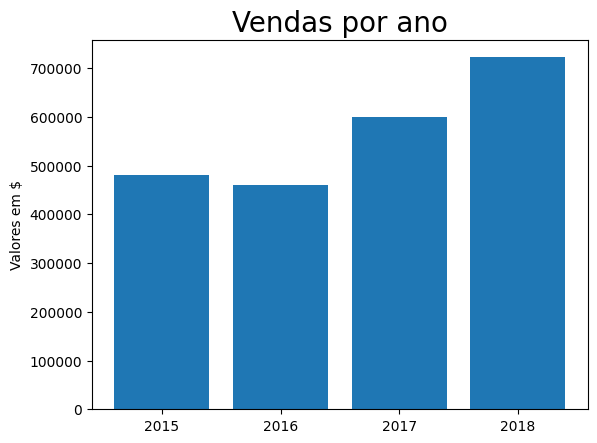

In [203]:
fig,ax = plt.subplots()

ax.bar(vendas_ano.index, vendas_ano.values)
ax.set_title('Vendas por ano',fontsize = 20)
ax.set_ylabel('Valores em $')
ax.xaxis.set_ticks([2015,2016,2017,2018])
plt.show()

In [204]:
# Pergunta de négocio 2, vendas por mês

In [205]:
# criando a coluna mês já que não temos ela previamente
df['Mes'] = df['Order Date'].dt.month

In [206]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


In [207]:
# groupy por mês e por ano
vendas_mes = df.groupby(['Mes','Ano'])['Sales'].sum().reset_index()

In [208]:
#filtrando valores de 2015 apenas por exemplo
vendas_mes[vendas_mes['Ano'] == 2015].head()

,Mes,Ano,Sales
0,1,2015,14205.707
4,2,2015,4519.892
8,3,2015,55205.797
12,4,2015,27906.855
16,5,2015,23644.303


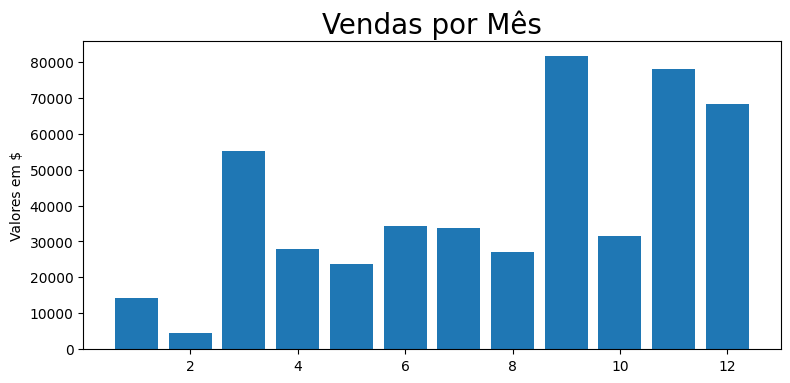

In [209]:
#tornando isso visual

fig,ax = plt.subplots(figsize=(9,4))

ax.bar(vendas_mes[vendas_mes['Ano'] == 2015].Mes.values, vendas_mes[vendas_mes['Ano'] == 2015].Sales.values)
ax.set_title('Vendas por Mês',fontsize = 20)
ax.set_ylabel('Valores em $')
plt.show()

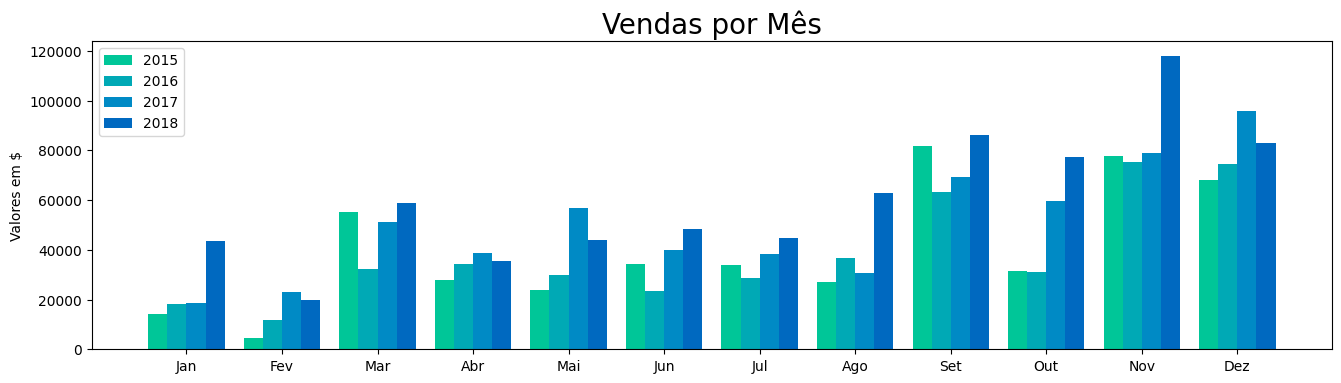

In [210]:
#Grafico de vendas por mês duarante o ano
fig,ax = plt.subplots(figsize=(16,4))

wid = 0.2

ax.bar(vendas_mes[vendas_mes['Ano'] == 2015].Mes.values-wid-wid/2, vendas_mes[vendas_mes['Ano'] == 2015].Sales.values, color = '#00c698',label = '2015',width=wid)
ax.set_title('Vendas por Mês',fontsize = 20)
ax.set_ylabel('Valores em $')

ax.bar(vendas_mes[vendas_mes['Ano'] == 2016].Mes.values-wid/2, vendas_mes[vendas_mes['Ano'] == 2016].Sales.values, color = '#00a9b5',label = '2016',width=wid)
ax.bar(vendas_mes[vendas_mes['Ano'] == 2017].Mes.values+wid/2, vendas_mes[vendas_mes['Ano'] == 2017].Sales.values, color = '#008ac5',label = '2017',width=wid)
ax.bar(vendas_mes[vendas_mes['Ano'] == 2018].Mes.values+wid+wid/2, vendas_mes[vendas_mes['Ano'] == 2018].Sales.values, color = '#0069c0',label = '2018',width=wid)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x', labelsize = 10)

ax.legend()

plt.show()

In [211]:
# pergunta de negocio 3, quantidade mais vendida por categoria

In [212]:
#ordenando por groupby
categoria = df.groupby(['Category','Ano'])['Sales'].sum().reset_index()

In [234]:
categoria.head()

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200


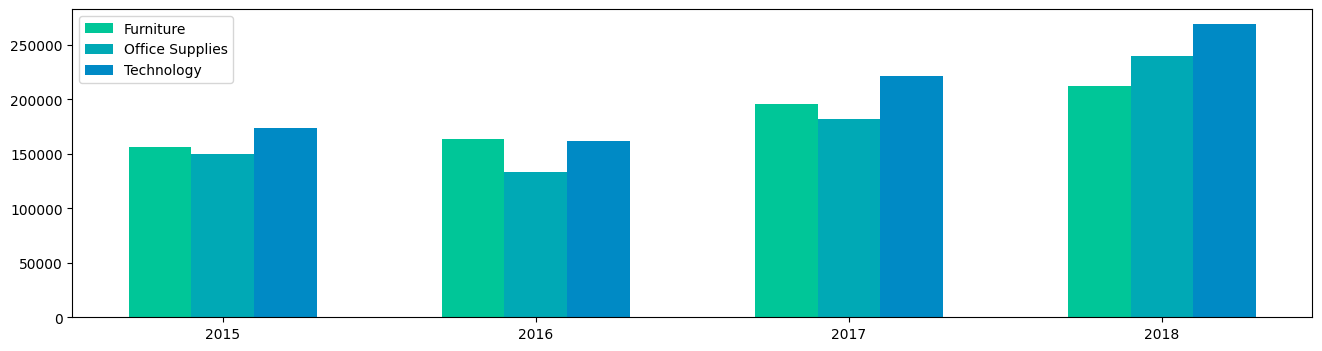

In [235]:
#Reaproveitando lógica do gráfico anterior
fig,ax = plt.subplots(figsize=(16,4))

wid = 0.2

ax.bar(categoria[categoria['Category'] == 'Furniture'].Ano.values-wid,categoria[categoria['Category'] == 'Furniture'].Sales.values,
       color = '#00c698',label='Furniture',width=wid)
ax.bar(categoria[categoria['Category'] == 'Office Supplies'].Ano.values,categoria[categoria['Category'] == 'Office Supplies'].Sales.values,
       color = '#00a9b5',label='Office Supplies',width=wid)
ax.bar(categoria[categoria['Category'] == 'Technology'].Ano.values+wid,categoria[categoria['Category'] == 'Technology'].Sales.values,
       color = '#008ac5',label='Technology',width=wid)

ax.xaxis.set_ticks([2015,2016,2017,2018])

ax.legend()

plt.show()

In [236]:
# pergunta de negocio 4, produto mais vendido

In [237]:
#novamente o uso do groupby
itens= df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

In [256]:
itens.head()

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


In [257]:
#variavel n para visualização dinâmica
n = 10
top_itens = itens.head(n)

In [275]:
top_itens

,Product Name,Sales,uniao
404,Canon imageCLASS 2200 Advanced Copier,61599.824,unir
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir
785,HON 5400 Series Task Chairs for Big and Tall,21870.576,unir
685,GBC DocuBind TL300 Electric Binding System,19823.479,unir
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,unir
804,Hewlett Packard LaserJet 3310 Copier,18839.686,unir
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,unir
682,GBC DocuBind P400 Electric Binding System,17965.068,unir
812,High Speed Automatic Electric Letter Opener,17030.312,unir


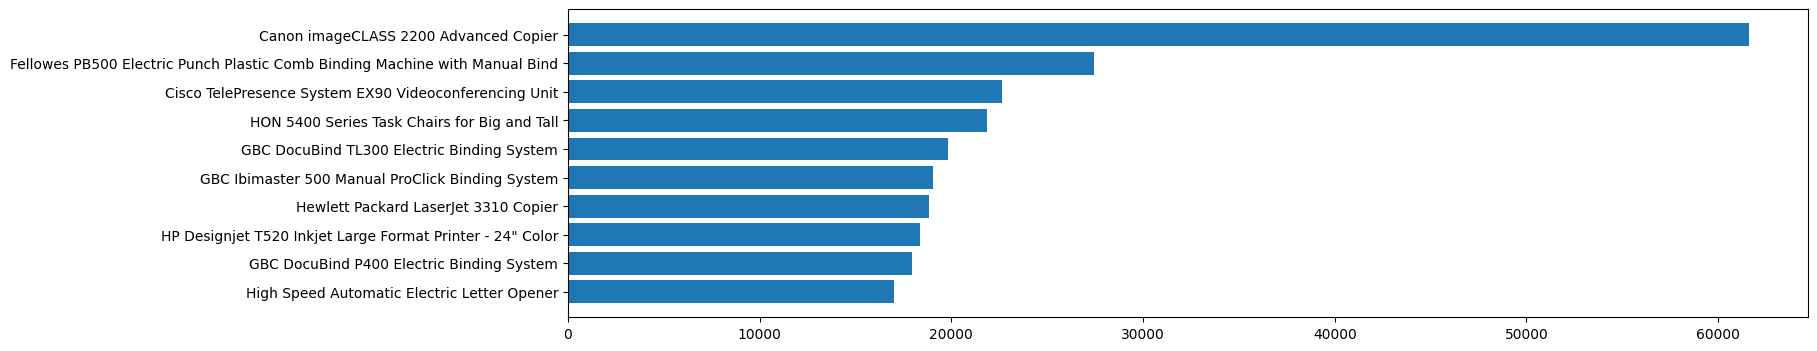

In [276]:
#Reaproveitando lógica do gráfico anterior
fig,ax = plt.subplots(figsize=(16,4))


ax.barh(top_itens['Product Name'].values,
        top_itens['Sales'].values,
        align = 'center')

ax.invert_yaxis() #inverter eixo y

plt.show()

In [277]:
# pergunta de negocio 5, produto mais vendido por ano

In [278]:
#novamente o uso do groupby
itens_ano =df.groupby(['Product Name', 'Ano'])['Sales'].sum().reset_index()

In [279]:
#filtro rapido
itens_ano[itens_ano['Product Name'] == top_itens.iloc[1,0]]

,Product Name,Ano,Sales
1854,Fellowes PB500 Electric Punch Plastic Comb Bin...,2015,2033.584
1855,Fellowes PB500 Electric Punch Plastic Comb Bin...,2016,15760.276
1856,Fellowes PB500 Electric Punch Plastic Comb Bin...,2017,2287.782
1857,Fellowes PB500 Electric Punch Plastic Comb Bin...,2018,7371.742


In [280]:
#usando merge para unir os top10 itens com datas

In [281]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


In [282]:
df_datas['uniao'] = 'unir'
top_itens['uniao'] = 'unir'

C:\Users\LuanzinChave\AppData\Local\Temp\ipykernel_11100\1271131965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_itens['uniao'] = 'unir'


In [283]:
produto_ano = pd.merge(
    top_itens,
    df_datas,
    how = 'outer',
    on='uniao'
)

In [284]:
itens_ano_g= pd.merge(
    produto_ano,
    itens_ano,
    how= 'left',
    on=['Product Name', 'Ano']
)

In [285]:
itens_ano_g.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


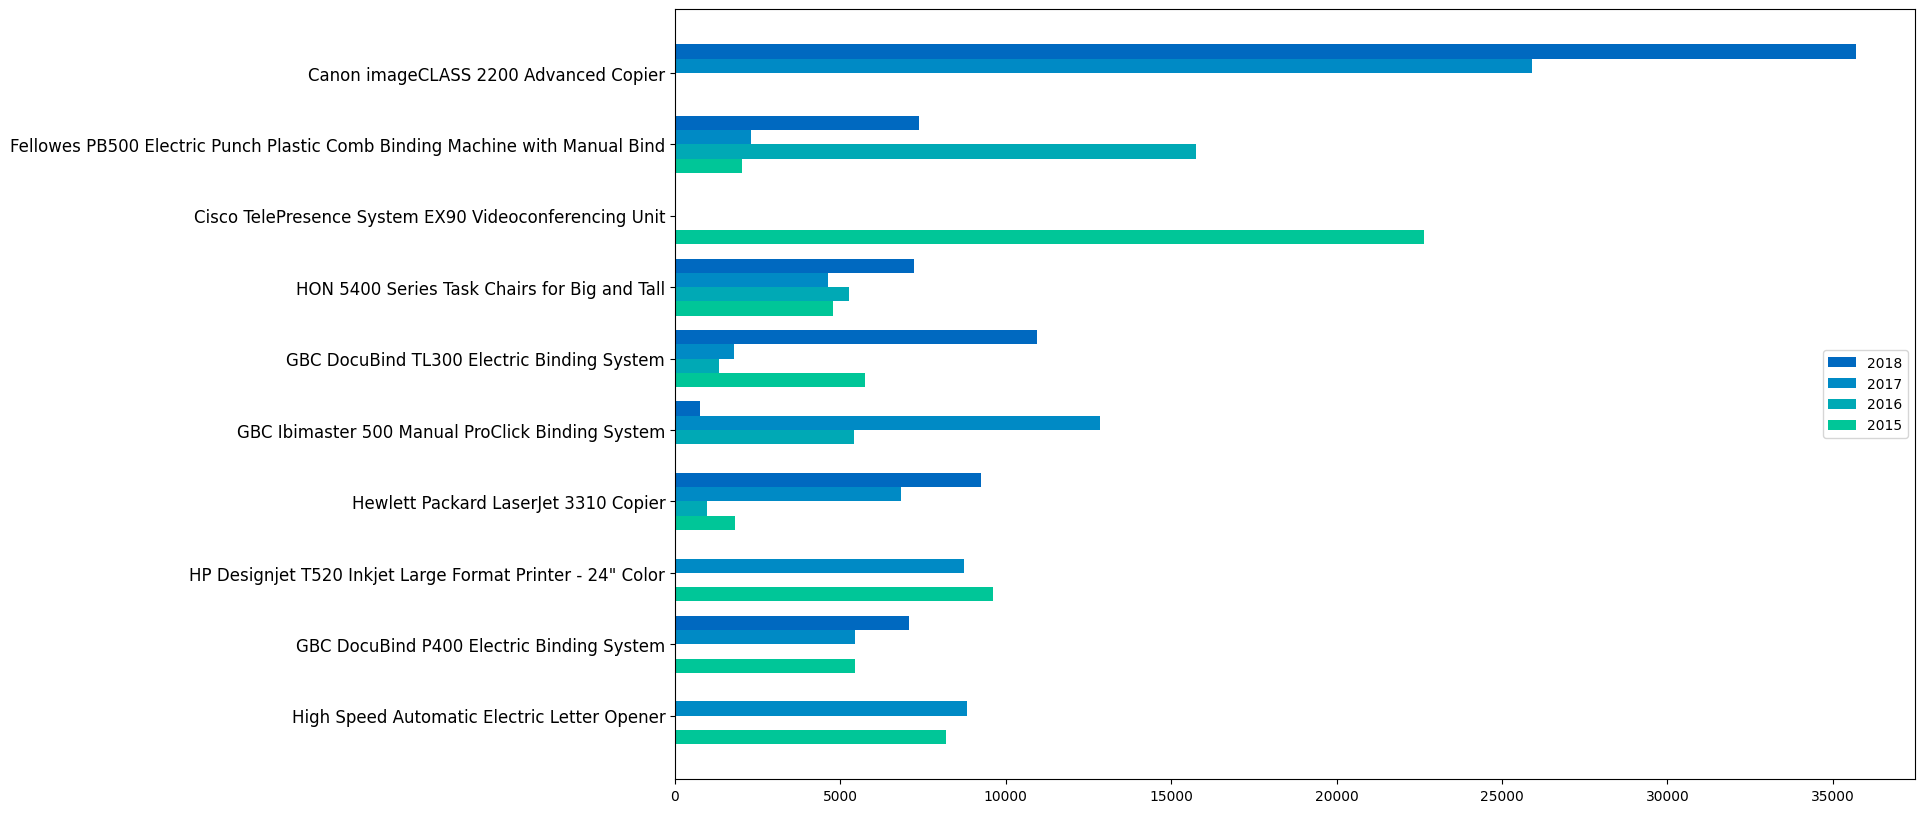

In [286]:
#tornando isso visual, reaproveitando os graficos anteriores

fig,ax = plt.subplots(figsize=(16,10))

hgt = 0.2

qtd_itens = len(top_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2018].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2018,
        color = '#0069c0')
ax.barh(np.arange(0,qtd_itens)-hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2017].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2017,
        color = '#008ac5'
        )
ax.barh(np.arange(0,qtd_itens) + hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2016].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2016,
        color = '#00a9b5'
        )
ax.barh(np.arange(0,qtd_itens) + hgt+hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2015].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2015,
        color = '#00c698'
        )

ax.invert_yaxis() #inverter eixo y
ax.legend()

ax.yaxis.set_ticks(np.arange(0,qtd_itens))
ax.set_yticklabels(top_itens['Product Name'])
ax.tick_params(axis='y', labelsize = 12)


plt.show()

In [287]:
#Resumo das perguntas

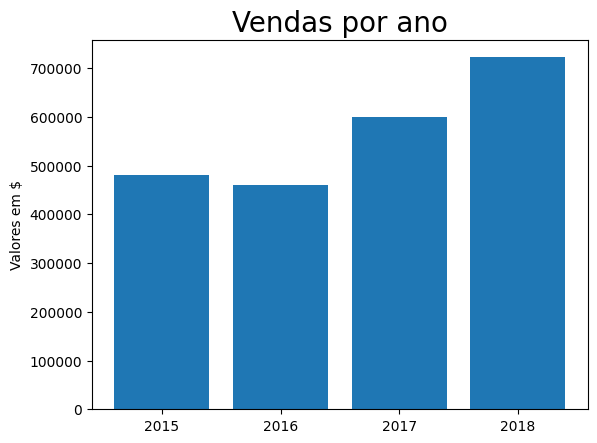

In [288]:
# 1. Vendas por ano
fig,ax = plt.subplots()

ax.bar(vendas_ano.index, vendas_ano.values)
ax.set_title('Vendas por ano',fontsize = 20)
ax.set_ylabel('Valores em $')
ax.xaxis.set_ticks([2015,2016,2017,2018])
plt.show()

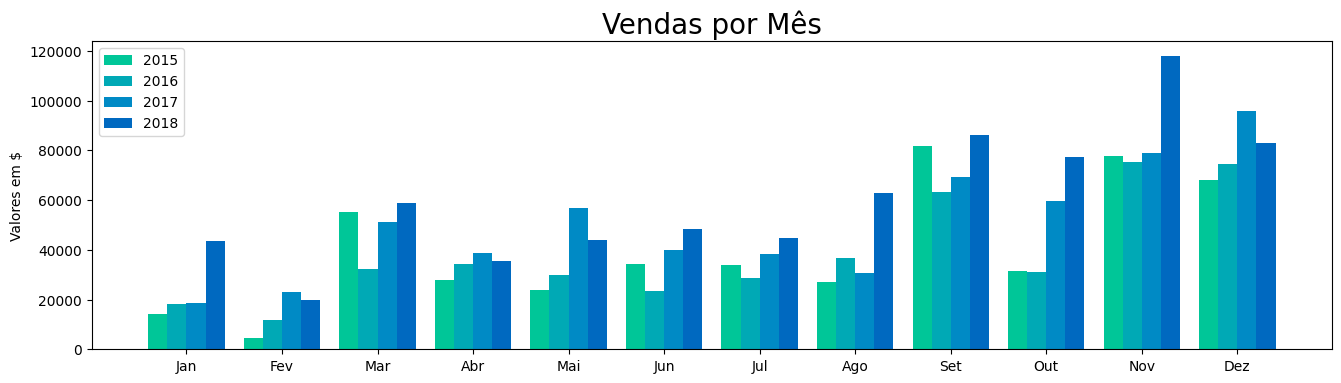

In [289]:
# 2. Vendas por mês
fig,ax = plt.subplots(figsize=(16,4))

wid = 0.2

ax.bar(vendas_mes[vendas_mes['Ano'] == 2015].Mes.values-wid-wid/2, vendas_mes[vendas_mes['Ano'] == 2015].Sales.values, color = '#00c698',label = '2015',width=wid)
ax.set_title('Vendas por Mês',fontsize = 20)
ax.set_ylabel('Valores em $')

ax.bar(vendas_mes[vendas_mes['Ano'] == 2016].Mes.values-wid/2, vendas_mes[vendas_mes['Ano'] == 2016].Sales.values, color = '#00a9b5',label = '2016',width=wid)
ax.bar(vendas_mes[vendas_mes['Ano'] == 2017].Mes.values+wid/2, vendas_mes[vendas_mes['Ano'] == 2017].Sales.values, color = '#008ac5',label = '2017',width=wid)
ax.bar(vendas_mes[vendas_mes['Ano'] == 2018].Mes.values+wid+wid/2, vendas_mes[vendas_mes['Ano'] == 2018].Sales.values, color = '#0069c0',label = '2018',width=wid)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x', labelsize = 10)

ax.legend()

plt.show()

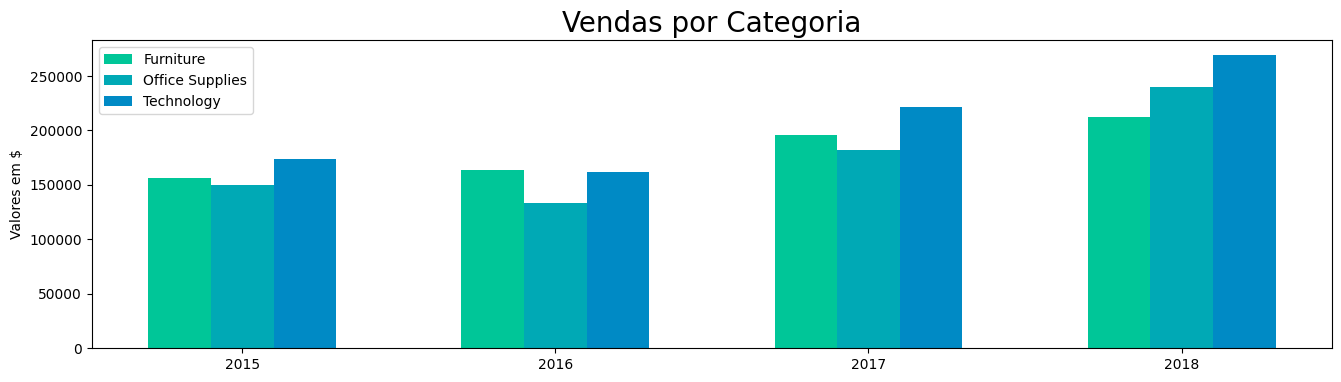

In [290]:
# 3. Vendas por Categoria
fig,ax = plt.subplots(figsize=(16,4))

wid = 0.2

ax.set_title('Vendas por Categoria',fontsize=20)
ax.set_ylabel('Valores em $')

ax.bar(categoria[categoria['Category'] == 'Furniture'].Ano.values-wid,categoria[categoria['Category'] == 'Furniture'].Sales.values,
       color = '#00c698',label='Furniture',width=wid)
ax.bar(categoria[categoria['Category'] == 'Office Supplies'].Ano.values,categoria[categoria['Category'] == 'Office Supplies'].Sales.values,
       color = '#00a9b5',label='Office Supplies',width=wid)
ax.bar(categoria[categoria['Category'] == 'Technology'].Ano.values+wid,categoria[categoria['Category'] == 'Technology'].Sales.values,
       color = '#008ac5',label='Technology',width=wid)

ax.xaxis.set_ticks([2015,2016,2017,2018])

ax.legend()

plt.show()

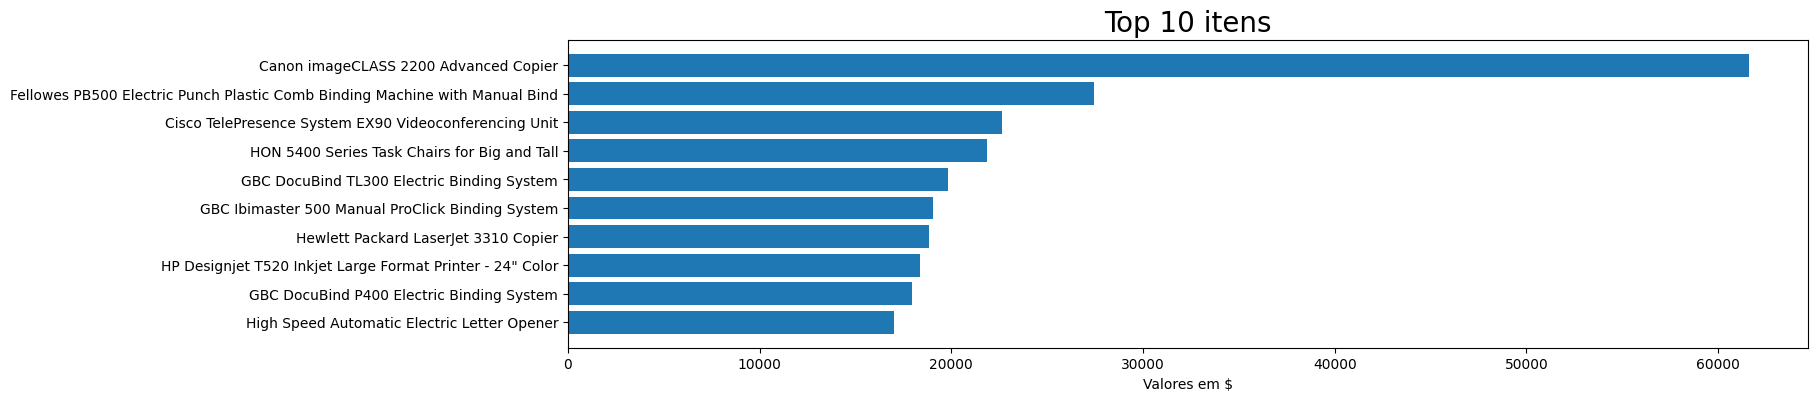

In [291]:
#4 Itens mais vendidos
fig,ax = plt.subplots(figsize=(16,4))

ax.set_title('Top 10 itens', fontsize=20)
ax.set_xlabel('Valores em $')

ax.barh(top_itens['Product Name'].values,
        top_itens['Sales'].values,
        align = 'center')

ax.invert_yaxis() #inverter eixo y

plt.show()

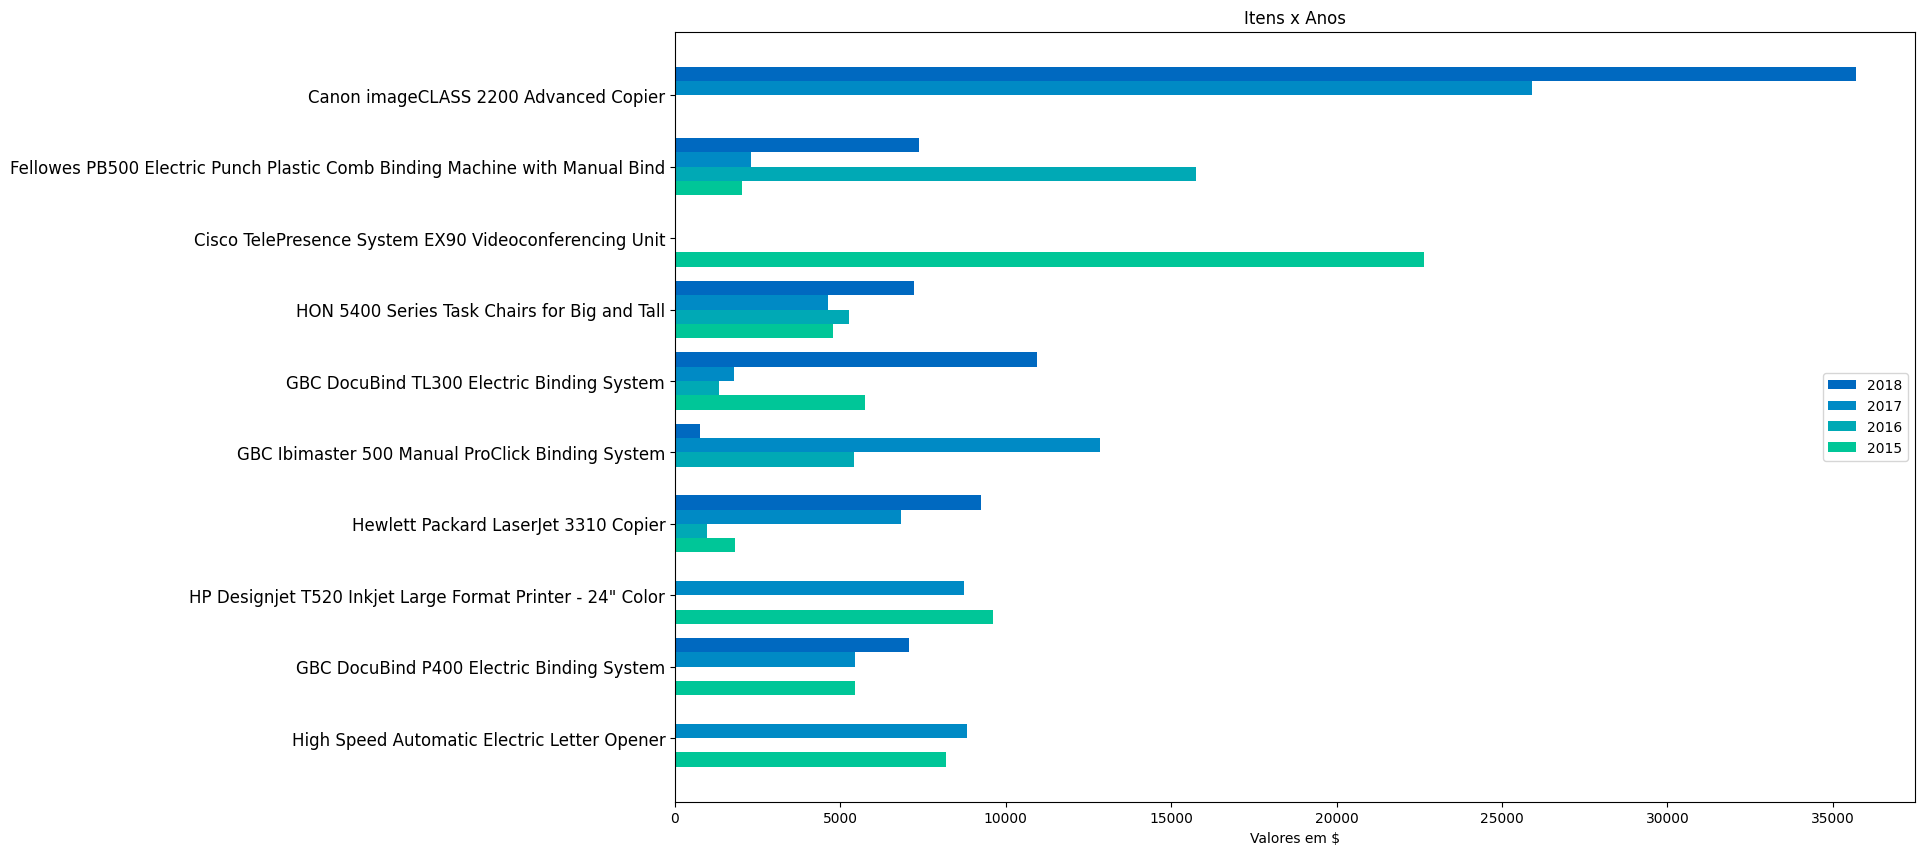

In [292]:
#5 Itens x Anos
ig,ax = plt.subplots(figsize=(16,10))

hgt = 0.2

qtd_itens = len(top_itens)

ax.set_title('Itens x Anos')
ax.set_xlabel('Valores em $')

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2018].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2018,
        color = '#0069c0')
ax.barh(np.arange(0,qtd_itens)-hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2017].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2017,
        color = '#008ac5'
        )
ax.barh(np.arange(0,qtd_itens) + hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2016].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2016,
        color = '#00a9b5'
        )
ax.barh(np.arange(0,qtd_itens) + hgt+hgt/2,
        itens_ano_g[itens_ano_g['Ano'] == 2015].Sales_y.values,
        align = 'center',
        height=hgt,
        label = 2015,
        color = '#00c698'
        )

ax.invert_yaxis() #inverter eixo y
ax.legend()

ax.yaxis.set_ticks(np.arange(0,qtd_itens))
ax.set_yticklabels(top_itens['Product Name'])
ax.tick_params(axis='y', labelsize = 12)


plt.show()
